In [1]:
import pandas as pd
import numpy as np

Asset = pd.read_excel('C:\\MY R&A\\analysinng fin stability\\_1.Liabilities and Assets of Scheduled Commercial Banks .xlsx',sheet_name='ASSETS', skiprows= 6 )
Asset = Asset.drop('Unnamed: 0', axis=1)
Liab =  pd.read_excel('C:\\MY R&A\\analysinng fin stability\\_1.Liabilities and Assets of Scheduled Commercial Banks 1.xlsx',sheet_name='LIABILITIES', skiprows= 7)
Liab = Liab.drop('Unnamed: 0', axis=1)
Liab = Liab.drop('Unnamed: 35', axis=1)
Liab.head()

,Year,Banks,1. Capital,2. Reserves and Surplus,2.1 Statutory Reserve,2.2 Capital Reserve,2.3 Share Premium,2.4 Revenue and other Reserves,2.5 Balance of Profit,3. Deposits,...,4.2. Borrowings outside India,Secured borrowings included in 4.,5. Other liabilities & provisions,5.1. Bills Payable,5.2. Inter-office adjustments,5.3. Interest accrued,5.4.Subordinate debt,5.5. Deferred Tax Liabilities,5.6.Others (including provisions),Total Liabilities
0,2024,BANK OF BARODA,1035.533600,111188.0547,23125.1449,13212.7752,31312.1513,43537.9833,-,1326957.842,...,9704.6959,30640.2292,52213.4011,3821.6005,10.4882,6693.4514,-,-,41687.861,1.585797e+06
1,2024,BANK OF INDIA,4553.407000,64327.2643,11065.8842,3421.6579,20285.5883,22275.9892,7278.1447,737920.2058,...,8048.8508,21387.0541,24872.9799,1657.6093,-,3180.6765,-,-,20034.6941,9.125979e+05
2,2024,BANK OF MAHARASHTRA,7081.373639,12592.52566,3439.3512,719.6955,977.4356,3953.9337,3502.109661,270747.1682,...,-,-,8997.9370,1179.4801,-,382.8,-,-,7435.6569,3.071379e+05
3,2024,CANARA BANK,1814.130300,85140.4605,19430.7013,7200.7604,13919.0082,32709.3689,11880.6217,1312366.613,...,2375.0482,-,34627.2390,2527.0665,-,9883.2969,-,-,22216.8756,1.491541e+06
4,2024,CENTRAL BANK OF INDIA,8680.939400,23467.0251,3357.6227,1913.3086,7466.6328,8038.0889,2691.3721,385011.3226,...,-,-,9707.7473,991.4552,-,644.1814,-,-,8072.1107,4.466727e+05


In [2]:

BS = pd.merge(Asset,Liab,on = ['Banks','Year'], how ='left')
earnings = pd.read_excel('C:\\MY R&A\\analysinng fin stability\\_2.Earnings and Expenses of Scheduled Commercial Banks.xlsx', sheet_name='EARNINGS',skiprows= 7)
expenses  = pd.read_excel('C:\\MY R&A\\analysinng fin stability\\_2.Earnings and Expenses of Scheduled Commercial Banks.xlsx', sheet_name='EXPENSES',skiprows= 7)
Earn_Expen = pd.merge(earnings,expenses,on = ['Banks','Year'], how = 'left')
# print(Liab.columns)
print(BS.dtypes)
print(Earn_Expen.dtypes)

Year                                    object
Banks                                   object
1.     Cash in hand                     object
2.     Balances with RBI               float64
3.     Balances with banks in India     object
                                        ...   
5.3.      Interest accrued              object
5.4.Subordinate debt                    object
5.5.      Deferred Tax Liabilities      object
5.6.Others (including provisions)       object
Total Liabilities                      float64
Length: 75, dtype: object
Unnamed: 0_x                                                     float64
Year                                                              object
Banks                                                             object
a)   Interest/Discount earned on advances/bills                   object
b)   Income on investments                                        object
c)   Interest on balances with RBI and other inter-bank funds     object
d)   Others        

In [3]:
exclude_cols = ['Year'] 

# Columns to replace in
cols_to_replace = [col for col in BS.columns if col not in exclude_cols]

# Replace '-' with 0 in those columns
BS[cols_to_replace] = BS[cols_to_replace].replace('-', 0)

exclude_cols = ['Year'] 

# Columns to replace in
cols_to_replace = [col for col in Earn_Expen.columns if col not in exclude_cols]

# Replace '-' with 0 in those columns
Earn_Expen[cols_to_replace] = Earn_Expen[cols_to_replace].replace('-', 0)

BS= BS.copy()
print(BS.columns)

Index(['Year', 'Banks', '1.     Cash in hand', '2.     Balances with RBI',
       '3.     Balances with banks in India',
       '4.     Money at call and short notice',
       '5.     Balances with banks outside India', '6.     Investments',
       '6.1.       Investments in India', '(i)     Government securities',
       '(ii)    Other approved securities', '(iii)   Shares',
       '(iv)   Debentures and Bonds',
       '(v)    Subsidiaries and/or joint ventures', '(vi)   Others',
       '6.2.       Investments outside India',
       '(i)      Government securities',
       '(ii)    Subsidiaries and/or joint ventures', '(iii)   Others',
       '7.     Advances', '7A.1.    Bills purchased and discounted',
       '7A.2.    Cash credits, overdrafts & loans', '7A.3.    Term loans',
       '7B.1.    Secured by tangible assets',
       '7B.2.    Covered by Bank/Govt. Guarantees', '7B.3.    Unsecured',
       '7C.1.     Advances in India', '(i)         Priority sectors ',
       '(ii)        

C:\Users\vinee\AppData\Local\Temp\ipykernel_2600\4235281709.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  BS[cols_to_replace] = BS[cols_to_replace].replace('-', 0)
C:\Users\vinee\AppData\Local\Temp\ipykernel_2600\4235281709.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Earn_Expen[cols_to_replace] = Earn_Expen[cols_to_replace].replace('-', 0)


In [4]:

Earn_Expen['Net Profit'] = pd.to_numeric(Earn_Expen['VIII.  Profit (Loss) during the year'], errors='coerce')
BS['Total_Assets'] = pd.to_numeric(BS['Total Assets'], errors='coerce')
BS['Capital'] = pd.to_numeric(BS['1.     Capital'], errors='coerce')
BS['Reserves'] = pd.to_numeric(BS['2. Reserves and Surplus'], errors='coerce')
BS['ROA'] = Earn_Expen['Net Profit']/ BS['Total Assets']
BS['EQUITY'] = BS['Capital'] + BS['Reserves']
BS['EQUITY TO ASSETS RATIO'] = BS['EQUITY']/BS['Total Assets']

print(BS.tail())
BS = BS.drop(index=[1880,1881])

                     Year                           Banks  \
1877                 2005                    UFJ BANK LTD   
1878                 2005                   FOREIGN BANKS   
1879                 2005  ALL SCHEDULED COMMERCIAL BANKS   
1880                  NaN                             NaN   
1881  See Notes on Tables                             NaN   

      1.     Cash in hand  2.     Balances with RBI  \
1877               0.0256                    6.6904   
1878             345.9404                 6413.0705   
1879            9644.8483               108430.6342   
1880                  NaN                       NaN   
1881                  NaN                       NaN   

      3.     Balances with banks in India  \
1877                              76.2167   
1878                            7137.8821   
1879                           39890.1360   
1880                                  NaN   
1881                                  NaN   

      4.     Money at call and 

In [5]:

# Step 1: Save original row order
BS['OriginalIndex'] = BS.index

# Step 2: Sort for rolling calculation
BS = BS.sort_values(by=['Banks', 'Year'])

# Step 3: Perform rolling std calculation
BS['ROA_std'] = BS.groupby('Banks')['ROA'].rolling(3).std().reset_index(level=0, drop=True)

# Step 4: Restore original row order
BS = BS.sort_values(by='OriginalIndex').drop(columns='OriginalIndex')

# BS['ROA_std'] = BS. groupby('Banks')['ROA'].rolling(3).std().reset_index(level=0,drop=True)
BS['Z-Score'] = np.where(
    (BS['ROA_std'] > 0) & ((BS['ROA'] + BS['EQUITY TO ASSETS RATIO']) > 0),
   np.log((BS['ROA'] + BS['EQUITY TO ASSETS RATIO']) / BS['ROA_std']),
    np.nan
)

# print(BS.columns)
BS['Z-Score']

c:\MY R&A\Stock prediction by sentimental analysis\stock_prediction\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       3.358554
1       4.193199
2       2.931209
3       3.265707
4       3.939097
          ...   
1875         NaN
1876         NaN
1877         NaN
1878         NaN
1879         NaN
Name: Z-Score, Length: 1880, dtype: float64

In [6]:

BS1 = BS.copy()
BS1['Net Profit'] = Earn_Expen['Net Profit']
print(BS1.columns)


BS1['Loans'] = pd.to_numeric(BS['7C.1.     Advances in India'], errors='coerce') +  pd.to_numeric(BS['7C.2.    Advances outside India'], errors='coerce')
BS1['Deposits'] = pd.to_numeric(BS['3. Deposits'], errors='coerce')
BS1['LDR'] = BS1['Loans'] / BS1['Deposits']

BS1.head()


Index(['Year', 'Banks', '1.     Cash in hand', '2.     Balances with RBI',
       '3.     Balances with banks in India',
       '4.     Money at call and short notice',
       '5.     Balances with banks outside India', '6.     Investments',
       '6.1.       Investments in India', '(i)     Government securities',
       '(ii)    Other approved securities', '(iii)   Shares',
       '(iv)   Debentures and Bonds',
       '(v)    Subsidiaries and/or joint ventures', '(vi)   Others',
       '6.2.       Investments outside India',
       '(i)      Government securities',
       '(ii)    Subsidiaries and/or joint ventures', '(iii)   Others',
       '7.     Advances', '7A.1.    Bills purchased and discounted',
       '7A.2.    Cash credits, overdrafts & loans', '7A.3.    Term loans',
       '7B.1.    Secured by tangible assets',
       '7B.2.    Covered by Bank/Govt. Guarantees', '7B.3.    Unsecured',
       '7C.1.     Advances in India', '(i)         Priority sectors ',
       '(ii)        

,Year,Banks,1. Cash in hand,2. Balances with RBI,3. Balances with banks in India,4. Money at call and short notice,5. Balances with banks outside India,6. Investments,6.1. Investments in India,(i) Government securities,...,Reserves,ROA,EQUITY,EQUITY TO ASSETS RATIO,ROA_std,Z-Score,Net Profit,Loans,Deposits,LDR
0,2024,BANK OF BARODA,3938.2844,50901.5490,1288.1536,13390.3506,25605.8007,369816.8374,353524.3761,322148.9603,...,111188.05470,0.011218,112223.588300,0.070768,0.002852,3.358554,17788.7846,1.065782e+06,1.326958e+06,0.803177
1,2024,BANK OF INDIA,2127.0221,36429.2466,2439.4785,16607.2803,25334.1049,227144.4677,215887.4254,199999.0694,...,64327.26430,0.006923,68880.671300,0.075478,0.001244,4.193199,6317.9166,5.631447e+05,7.379202e+05,0.763151
2,2024,BANK OF MAHARASHTRA,1015.6986,20145.6410,16.3829,9128.3172,5.6219,68274.1197,68274.1197,64282.4851,...,12592.52566,0.013203,19673.899299,0.064056,0.004120,2.931209,4055.0272,2.002399e+05,2.707472e+05,0.739583
3,2024,CANARA BANK,3361.2540,67706.9296,2141.7120,39526.8209,38023.0059,357454.4215,354656.0525,342583.2528,...,85140.46050,0.009758,86954.590800,0.058299,0.002598,3.265707,14554.3192,9.316128e+05,1.312367e+06,0.709872
4,2024,CENTRAL BANK OF INDIA,1426.1838,21528.5053,29.2870,0.0000,14623.5204,143923.4863,143875.9978,112720.8365,...,23467.02510,0.005707,32147.964500,0.071972,0.001512,3.939097,2549.0580,2.434063e+05,3.850113e+05,0.632206


In [7]:

Earn_Expen['Non_Interest_Income'] = pd.to_numeric(Earn_Expen['Total (II)'], errors='coerce')
Earn_Expen['Total_Income'] = pd.to_numeric(Earn_Expen['Total (I+II)'], errors='coerce')
Earn_Expen['Non_Interest_Income_Ratio'] = Earn_Expen['Non_Interest_Income'] / Earn_Expen['Total_Income']
BS1['Non_Interest_Income_Ratio'] = Earn_Expen['Non_Interest_Income_Ratio']

BS1.columns

Index(['Year', 'Banks', '1.     Cash in hand', '2.     Balances with RBI',
       '3.     Balances with banks in India',
       '4.     Money at call and short notice',
       '5.     Balances with banks outside India', '6.     Investments',
       '6.1.       Investments in India', '(i)     Government securities',
       '(ii)    Other approved securities', '(iii)   Shares',
       '(iv)   Debentures and Bonds',
       '(v)    Subsidiaries and/or joint ventures', '(vi)   Others',
       '6.2.       Investments outside India',
       '(i)      Government securities',
       '(ii)    Subsidiaries and/or joint ventures', '(iii)   Others',
       '7.     Advances', '7A.1.    Bills purchased and discounted',
       '7A.2.    Cash credits, overdrafts & loans', '7A.3.    Term loans',
       '7B.1.    Secured by tangible assets',
       '7B.2.    Covered by Bank/Govt. Guarantees', '7B.3.    Unsecured',
       '7C.1.     Advances in India', '(i)         Priority sectors ',
       '(ii)        

In [8]:
Maturity = pd.read_excel('C:\\MY R&A\\analysinng fin stability\\_9.Maturity Profile of Select Items of Liabilities and Assets of Scheduled Commercial Banks.xlsx', skiprows= 7)
Maturity = Maturity.drop('Unnamed: 0', axis=1)
Maturity = Maturity.replace('-',0)
# Maturity['Short_Assets'] = pd.to_numeric(Maturity['(19)']) + pd.to_numeric(Maturity['(20)']) + pd.to_numeric(Maturity['(21)']) + pd.to_numeric(Maturity['(22)']) + pd.to_numeric(Maturity['(23)']) + pd.to_numeric(Maturity['(28)']) + pd.to_numeric(Maturity['(29)']) + pd.to_numeric(Maturity['(30)']) + pd.to_numeric(Maturity['(31)']) + pd.to_numeric(Maturity['(32)']) + pd.to_numeric(Maturity['(46)']) + pd.to_numeric(Maturity['(47)']) + pd.to_numeric(Maturity['(49)']) + pd.to_numeric(Maturity['(50)']) 
# Maturity['Short_Liability'] = pd.to_numeric(Maturity['(1)']) + pd.to_numeric(Maturity['(2)']) + pd.to_numeric(Maturity['(3)']) + pd.to_numeric(Maturity['(4)']) + pd.to_numeric(Maturity['(5)']) + pd.to_numeric(Maturity['(10)']) + pd.to_numeric(Maturity['(11)']) + pd.to_numeric(Maturity['(12)']) + pd.to_numeric(Maturity['(13)']) + pd.to_numeric(Maturity['(14)']) + pd.to_numeric(Maturity['(37)']) + pd.to_numeric(Maturity['(38)']) + pd.to_numeric(Maturity['(39)']) + pd.to_numeric(Maturity['(40)']) + pd.to_numeric(Maturity['(41)'])

# BS1['ALM_Gap'] = pd.to_numeric(Maturity['Short_Liability'], errors='coerce')  - pd.to_numeric(Maturity['Short_Assets'], errors='coerce')

# print(BS1['ALM_Gap'])


Maturity['1-28_days'] = pd.to_numeric(Maturity['(19)']) + pd.to_numeric(Maturity['(20)']) + pd.to_numeric(Maturity['(28)']) + pd.to_numeric(Maturity['(29)']) +  pd.to_numeric(Maturity['(46)']) + pd.to_numeric(Maturity['(47)']) - pd.to_numeric(Maturity['(1)']) - pd.to_numeric(Maturity['(2)']) - pd.to_numeric(Maturity['(10)']) - pd.to_numeric(Maturity['(11)']) - pd.to_numeric(Maturity['(37)']) - pd.to_numeric(Maturity['(38)'])

Maturity['29-3_months'] = pd.to_numeric(Maturity['(21)']) + pd.to_numeric(Maturity['(30)']) + pd.to_numeric(Maturity['(48)']) - pd.to_numeric(Maturity['(3)']) - pd.to_numeric(Maturity['(12)']) - pd.to_numeric(Maturity['(39)'])

Maturity['3-6_months'] = pd.to_numeric(Maturity['(22)']) + pd.to_numeric(Maturity['(31)']) + pd.to_numeric(Maturity['(49)']) - pd.to_numeric(Maturity['(4)']) - pd.to_numeric(Maturity['(13)']) - pd.to_numeric(Maturity['(40)'])

Maturity['6-1_year'] = pd.to_numeric(Maturity['(23)']) + pd.to_numeric(Maturity['(32)']) + pd.to_numeric(Maturity['(50)']) - pd.to_numeric(Maturity['(5)']) - pd.to_numeric(Maturity['(14)']) - pd.to_numeric(Maturity['(41)'])

Maturity['ALM_Gap'] = Maturity['1-28_days'] + Maturity['29-3_months'] + Maturity['3-6_months'] + Maturity['6-1_year']
Maturity['ALM_Gap'] = Maturity['ALM_Gap'].round(3)
Maturity.head()

# BS1['ALM_Gap'] = Maturity['ALM_Gap']
BS1 = BS1.reset_index(drop=True)
Maturity = Maturity.reset_index(drop=True)
BS1['ALM_Gap'] = Maturity['ALM_Gap']

BS1.head()

C:\Users\vinee\AppData\Local\Temp\ipykernel_2600\1863132241.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Maturity = Maturity.replace('-',0)


,Year,Banks,1. Cash in hand,2. Balances with RBI,3. Balances with banks in India,4. Money at call and short notice,5. Balances with banks outside India,6. Investments,6.1. Investments in India,(i) Government securities,...,EQUITY,EQUITY TO ASSETS RATIO,ROA_std,Z-Score,Net Profit,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap
0,2024,BANK OF BARODA,3938.2844,50901.5490,1288.1536,13390.3506,25605.8007,369816.8374,353524.3761,322148.9603,...,112223.588300,0.070768,0.002852,3.358554,17788.7846,1.065782e+06,1.326958e+06,0.803177,0.114046,-134470.840
1,2024,BANK OF INDIA,2127.0221,36429.2466,2439.4785,16607.2803,25334.1049,227144.4677,215887.4254,199999.0694,...,68880.671300,0.075478,0.001244,4.193199,6317.9166,5.631447e+05,7.379202e+05,0.763151,0.091234,-127270.994
2,2024,BANK OF MAHARASHTRA,1015.6986,20145.6410,16.3829,9128.3172,5.6219,68274.1197,68274.1197,64282.4851,...,19673.899299,0.064056,0.004120,2.931209,4055.0272,2.002399e+05,2.707472e+05,0.739583,0.127609,-70493.318
3,2024,CANARA BANK,3361.2540,67706.9296,2141.7120,39526.8209,38023.0059,357454.4215,354656.0525,342583.2528,...,86954.590800,0.058299,0.002598,3.265707,14554.3192,9.316128e+05,1.312367e+06,0.709872,0.148576,-136950.800
4,2024,CENTRAL BANK OF INDIA,1426.1838,21528.5053,29.2870,0.0000,14623.5204,143923.4863,143875.9978,112720.8365,...,32147.964500,0.071972,0.001512,3.939097,2549.0580,2.434063e+05,3.850113e+05,0.632206,0.132961,-86566.970


In [9]:
Fin_Stability = BS1[['Year', 'Banks', 'Net Profit', 'Total_Assets', 'Capital', 'Reserves','Loans','Deposits','LDR','Non_Interest_Income_Ratio','ALM_Gap',
                'EQUITY', 'ROA', 'ROA_std', 'EQUITY TO ASSETS RATIO', 'Z-Score']]

print(Fin_Stability.head())
Fin_Stability.to_csv('Fin_Stability_3.csv', index=False)

   Year                  Banks  Net Profit  Total_Assets      Capital  \
0  2024         BANK OF BARODA  17788.7846  1.585797e+06  1035.533600   
1  2024          BANK OF INDIA   6317.9166  9.125979e+05  4553.407000   
2  2024    BANK OF MAHARASHTRA   4055.0272  3.071379e+05  7081.373639   
3  2024            CANARA BANK  14554.3192  1.491541e+06  1814.130300   
4  2024  CENTRAL BANK OF INDIA   2549.0580  4.466727e+05  8680.939400   

       Reserves         Loans      Deposits       LDR  \
0  111188.05470  1.065782e+06  1.326958e+06  0.803177   
1   64327.26430  5.631447e+05  7.379202e+05  0.763151   
2   12592.52566  2.002399e+05  2.707472e+05  0.739583   
3   85140.46050  9.316128e+05  1.312367e+06  0.709872   
4   23467.02510  2.434063e+05  3.850113e+05  0.632206   

   Non_Interest_Income_Ratio     ALM_Gap         EQUITY       ROA   ROA_std  \
0                   0.114046 -134470.840  112223.588300  0.011218  0.002852   
1                   0.091234 -127270.994   68880.671300  0.0

In [10]:
df = pd.read_csv('Fin_Stability_3.csv')
exclude_col = 'Banks'

for col in df.columns:
    if col != exclude_col:
        df[col]= pd.to_numeric(df[col],errors='coerce').round(3)

# df.to_csv('FIN_STABILITY_data.csv',index = False)
# import os
# print(os.getcwd())

# FIN_STABILITY_data.head

df


,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
0,2024,BANK OF BARODA,17788.785,1585797.091,1035.534,111188.055,1065781.715,1326957.842,0.803,0.114,-134470.840,112223.588,0.011,0.003,0.071,3.359
1,2024,BANK OF INDIA,6317.917,912597.925,4553.407,64327.264,563144.665,737920.206,0.763,0.091,-127270.994,68880.671,0.007,0.001,0.075,4.193
2,2024,BANK OF MAHARASHTRA,4055.027,307137.860,7081.374,12592.526,200239.884,270747.168,0.740,0.128,-70493.318,19673.899,0.013,0.004,0.064,2.931
3,2024,CANARA BANK,14554.319,1491540.720,1814.130,85140.460,931612.833,1312366.613,0.710,0.149,-136950.800,86954.591,0.010,0.003,0.058,3.266
4,2024,CENTRAL BANK OF INDIA,2549.058,446672.685,8680.939,23467.025,243406.284,385011.323,0.632,0.133,-86566.970,32147.964,0.006,0.002,0.072,3.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,2005,STANDARD CHARTERED BANK,601.591,37208.631,515.418,2718.622,19970.316,22522.241,0.887,0.174,-7653.004,3234.040,0.016,NaN,0.087,NaN
1876,2005,THE ROYAL BANK OF SCOTLAND PLC,195.226,15395.284,NaN,NaN,9836.446,NaN,NaN,0.324,-2123.240,NaN,0.013,NaN,NaN,NaN
1877,2005,UFJ BANK LTD,6.816,324.003,186.802,41.038,102.276,70.793,1.445,0.240,86.090,227.840,0.021,NaN,0.703,NaN
1878,2005,FOREIGN BANKS,1982.371,153636.331,7012.937,11968.411,75318.253,86389.161,0.872,0.297,-10985.246,18981.348,0.013,NaN,0.124,NaN


### EXPLORATORY DATA ANALYSIS

In [11]:
data = pd.read_csv('Fin_Stability_3.csv')
Fin_sta_data = data.copy()
Fin_sta_data.head()

,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
0,2024,BANK OF BARODA,17788.7846,1.585797e+06,1035.533600,111188.05470,1.065782e+06,1.326958e+06,0.803177,0.114046,-134470.840,112223.588300,0.011218,0.002852,0.070768,3.358554
1,2024,BANK OF INDIA,6317.9166,9.125979e+05,4553.407000,64327.26430,5.631447e+05,7.379202e+05,0.763151,0.091234,-127270.994,68880.671300,0.006923,0.001244,0.075478,4.193199
2,2024,BANK OF MAHARASHTRA,4055.0272,3.071379e+05,7081.373639,12592.52566,2.002399e+05,2.707472e+05,0.739583,0.127609,-70493.318,19673.899299,0.013203,0.004120,0.064056,2.931209
3,2024,CANARA BANK,14554.3192,1.491541e+06,1814.130300,85140.46050,9.316128e+05,1.312367e+06,0.709872,0.148576,-136950.800,86954.590800,0.009758,0.002598,0.058299,3.265707
4,2024,CENTRAL BANK OF INDIA,2549.0580,4.466727e+05,8680.939400,23467.02510,2.434063e+05,3.850113e+05,0.632206,0.132961,-86566.970,32147.964500,0.005707,0.001512,0.071972,3.939097


In [12]:
Fin_sta_data.columns

Index(['Year', 'Banks', 'Net Profit', 'Total_Assets', 'Capital', 'Reserves',
       'Loans', 'Deposits', 'LDR', 'Non_Interest_Income_Ratio', 'ALM_Gap',
       'EQUITY', 'ROA', 'ROA_std', 'EQUITY TO ASSETS RATIO', 'Z-Score'],
      dtype='object')

FINDING THE MISSING VALUES

In [13]:
# Fin_sta_data.drop(index=1880, inplace=True)
Fin_sta_data.isnull().sum()

Year                           0
Banks                          0
Net Profit                     0
Total_Assets                   0
Capital                        5
Reserves                       5
Loans                          0
Deposits                       5
LDR                           35
Non_Interest_Income_Ratio      0
ALM_Gap                        0
EQUITY                         5
ROA                            0
ROA_std                      286
EQUITY TO ASSETS RATIO         5
Z-Score                      293
dtype: int64

In [14]:
Fin_sta_data[Fin_sta_data[['Capital','Reserves','Deposits']].isnull().any(axis=1)]

,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
1522,2009,THE ROYAL BANK OF SCOTLAND PLC,19.3956,30092.9978,NaN,NaN,16659.7419,NaN,NaN,0.281973,-7363.07,NaN,0.000645,0.006443,NaN,NaN
1607,2008,THE ROYAL BANK OF SCOTLAND PLC,280.6683,36617.0995,NaN,NaN,20381.4085,NaN,NaN,0.174851,-12847.77,NaN,0.007665,0.002930,NaN,NaN
1694,2007,THE ROYAL BANK OF SCOTLAND PLC,385.3451,28518.3189,NaN,NaN,18387.5531,NaN,NaN,0.282838,-6185.41,NaN,0.013512,0.001686,NaN,NaN
1784,2006,THE ROYAL BANK OF SCOTLAND PLC,241.6839,23539.9902,NaN,NaN,15073.2206,NaN,NaN,0.307998,-3283.58,NaN,0.010267,NaN,NaN,NaN
1876,2005,THE ROYAL BANK OF SCOTLAND PLC,195.2256,15395.2841,NaN,NaN,9836.4462,NaN,NaN,0.324212,-2123.24,NaN,0.012681,NaN,NaN,NaN


In [15]:
Fin_sta_data[Fin_sta_data['Banks'] == 'THE ROYAL BANK OF SCOTLAND PLC']


,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
1522,2009,THE ROYAL BANK OF SCOTLAND PLC,19.3956,30092.9978,NaN,NaN,16659.7419,NaN,NaN,0.281973,-7363.07,NaN,0.000645,0.006443,NaN,NaN
1607,2008,THE ROYAL BANK OF SCOTLAND PLC,280.6683,36617.0995,NaN,NaN,20381.4085,NaN,NaN,0.174851,-12847.77,NaN,0.007665,0.002930,NaN,NaN
1694,2007,THE ROYAL BANK OF SCOTLAND PLC,385.3451,28518.3189,NaN,NaN,18387.5531,NaN,NaN,0.282838,-6185.41,NaN,0.013512,0.001686,NaN,NaN
1784,2006,THE ROYAL BANK OF SCOTLAND PLC,241.6839,23539.9902,NaN,NaN,15073.2206,NaN,NaN,0.307998,-3283.58,NaN,0.010267,NaN,NaN,NaN
1876,2005,THE ROYAL BANK OF SCOTLAND PLC,195.2256,15395.2841,NaN,NaN,9836.4462,NaN,NaN,0.324212,-2123.24,NaN,0.012681,NaN,NaN,NaN


In [16]:
Fin_sta_data.dropna(subset=['Capital', 'Reserves', 'Deposits'], inplace=True)


In [17]:
Fin_sta_data.isnull().sum()
Fin_sta_data[Fin_sta_data['LDR'].isnull()]



,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
46,2024,COOPERATIEVE RABOBANK U.A.,62.7460,1045.58595,1220.0775,-224.87805,0.0,0.0,NaN,0.052507,82.508,995.19945,0.060010,0.042436,0.951810,3.171500
55,2024,FIRSTRAND BANK LTD,8.3570,374.11170,661.7140,-316.21720,0.0,0.0,NaN,0.503574,0.000,345.49680,0.022338,0.030787,0.923512,3.424980
62,2024,KRUNG THAI BANK PUBLIC COMPANY LIMITED,0.7882,62.38130,35.8445,26.08370,0.0,0.0,NaN,0.000121,0.000,61.92820,0.012635,0.021263,0.992737,3.856127
66,2024,NATWEST MARKETS PLC,-86.6826,4737.24190,2802.8210,-429.30530,0.0,0.0,NaN,0.003505,2459.749,2373.51570,-0.018298,NaN,0.501033,NaN
155,2023,FIRSTRAND BANK LTD,17.2259,360.80770,661.7140,-324.57420,0.0,0.0,NaN,0.597293,0.000,337.13980,0.047743,0.031733,0.934403,3.432377
162,2023,KRUNG THAI BANK PUBLIC COMPANY LIMITED,-1.7841,61.45490,35.8445,25.29550,0.0,0.0,NaN,0.007512,0.000,61.14000,-0.029031,0.016449,0.994876,4.072740
166,2023,NATWEST MARKETS PLC,-82.0484,4853.02840,2802.8210,-342.62270,0.0,0.0,NaN,0.003244,5048.600,2460.19830,-0.016907,NaN,0.506941,NaN
235,2022,ABU DHABI COMMERCIAL BANK PJSC,-10.1166,296.67280,217.0187,79.60100,0.0,0.0,NaN,0.396926,0.000,296.61970,-0.034100,0.155795,0.999821,1.824331
255,2022,FIRSTRAND BANK LTD,-4.7743,352.74240,661.7140,-341.80010,0.0,0.0,NaN,0.580069,0.000,319.91390,-0.013535,0.009366,0.906934,4.557926
276,2022,THE ROYAL BANK OF SCOTLAND N.V.,-79.4870,4760.45000,2802.8210,-260.57430,0.0,0.0,NaN,0.004644,2599.186,2542.24670,-0.016697,0.011172,0.534035,3.835263


In [18]:
LDR_NaN = 'COOPERATIEVE RABOBANK U.A.','FIRSTRAND BANK LTD','KRUNG THAI BANK PUBLIC COMPANY LIMITED','NATWEST MARKETS PLC','ABU DHABI COMMERCIAL BANK PJSC','THE ROYAL BANK OF SCOTLAND N.V.','WESTPAC BANKING CORPORATION','NATIONAL AUSTRALIA BANK','FIRST ABU DHABI BANK PJSC','UBS AG','PT BANK MAYBANK INDONESIA TBK','ING BANK N.V.','WOORI BANK'

LDR_NaN = list(LDR_NaN)
LDR_NaN

Asset[Asset['Banks'].isin(LDR_NaN)]

,Year,Banks,1. Cash in hand,2. Balances with RBI,3. Balances with banks in India,4. Money at call and short notice,5. Balances with banks outside India,6. Investments,6.1. Investments in India,(i) Government securities,...,8.1. Premises,8.2. Fixed assets under construction,8.3. Other Fixed assets,9. Other Assets,9.1. Inter-office adjustments (net),9.2. Interest accrued,9.3. Tax paid,9.4. Stationery and Stamps,9.5. Others,Total Assets
46,2024,COOPERATIEVE RABOBANK U.A.,-,13.7094,794.7982,-,0.0827,82.4254,82.4254,82.4254,...,-,-,-,154.57025,-,11.6504,104.5912,-,38.32865,1045.58595
54,2024,FIRST ABU DHABI BANK PJSC,-,179.0470,0.0474,-,13.731,5806.8488,5806.8488,5806.8488,...,-,-,1.1111,978.57660,-,141.0149,1.3995,-,836.1622,8172.43300
55,2024,FIRSTRAND BANK LTD,-,274.3916,60.6508,-,-,-,-,-,...,-,-,0.4508,38.61850,-,0.8615,0.7395,-,37.0175,374.11170
62,2024,KRUNG THAI BANK PUBLIC COMPANY LIMITED,0.0016,20.6498,40.329,-,-,-,-,-,...,-,-,0.0026,1.39830,-,0.3553,0.5701,-,0.4729,62.38130
66,2024,NATWEST MARKETS PLC,-,135.5617,20.7627,129.878,36.1898,4340.2043,2482.7558,2482.7558,...,-,-,-,74.64540,-,0.3757,0.0169,-,74.2528,4737.24190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,2006,PT BANK MAYBANK INDONESIA TBK,0.2925,1.3345,40.9269,2.85,0.7781,16.4586,16.4586,8.1486,...,6.2314,-,0.0879,41.70080,-,0.6284,0.5055,-,40.5669,117.81640
1848,2005,ABU DHABI COMMERCIAL BANK PJSC,0.5996,45.1830,380.9119,-,39.0282,1257.348,1257.348,542.6148,...,5.7803,-,1.8143,130.32660,-,55.8168,67.3826,0.0011,7.1261,1950.84570
1863,2005,ING BANK N.V.,0.001,9.2961,2.1461,29,-,-,-,-,...,-,-,-,66.89510,-,0.1469,7.995,-,58.7532,107.33830
1866,2005,KRUNG THAI BANK PUBLIC COMPANY LIMITED,0.0143,2.1601,14.5661,1.2,4.8305,33.1377,33.1377,25.9377,...,-,-,0.6446,3.03720,-,0.7234,0.2165,-,2.0973,75.80920


In [19]:
Liab[Liab['Banks'].isin(LDR_NaN)]

,Year,Banks,1. Capital,2. Reserves and Surplus,2.1 Statutory Reserve,2.2 Capital Reserve,2.3 Share Premium,2.4 Revenue and other Reserves,2.5 Balance of Profit,3. Deposits,...,4.2. Borrowings outside India,Secured borrowings included in 4.,5. Other liabilities & provisions,5.1. Bills Payable,5.2. Inter-office adjustments,5.3. Interest accrued,5.4.Subordinate debt,5.5. Deferred Tax Liabilities,5.6.Others (including provisions),Total Liabilities
46,2024,COOPERATIEVE RABOBANK U.A.,1220.0775,-224.87805,74.3057,-,-,15.4542,-314.63795,-,...,-,-,50.3865,-,-,-,-,-,50.3865,1045.58595
54,2024,FIRST ABU DHABI BANK PJSC,2012.5891,531.3976,142.4914,-,-,168.9399,219.9663,502.0321,...,-,4071.0981,1055.3161,-,-,6.0094,-,-,1049.3067,8172.43300
55,2024,FIRSTRAND BANK LTD,661.7140,-316.2172,14.7821,-,-,0.904,-331.9033,-,...,-,-,28.6149,-,-,-,-,-,28.6149,374.11170
62,2024,KRUNG THAI BANK PUBLIC COMPANY LIMITED,35.8445,26.0837,21.3988,-,-,1.3928,3.2921,-,...,-,-,0.4531,-,-,-,-,-,0.4531,62.38130
66,2024,NATWEST MARKETS PLC,2802.8210,-429.3053,30.1372,1.4307,-,0.6321,-461.5053,-,...,1881.8254,-,481.9008,0.5754,-,10.4426,-,-,470.8828,4737.24190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,2005,ABU DHABI COMMERCIAL BANK PJSC,0.2000,71.0214,13.0719,1.4711,-,8.8,74.9453,1662.5483,...,-,-,98.6445,3.3168,1.9217,68.2077,-,-,25.1983,1950.84570
1863,2005,ING BANK N.V.,67.9240,5.0505,5.0505,-,-,-,-,-,...,-,-,34.3638,-,-,-,-,-,34.3638,107.33830
1866,2005,KRUNG THAI BANK PUBLIC COMPANY LIMITED,35.8445,3.7493,1.4807,-,-,0.0611,2.2075,34.4643,...,-,-,1.7511,0.2658,-,0.2533,-,-,1.232,75.80920
1870,2005,NATWEST MARKETS PLC,169.0151,1177.8836,257.2311,1.6251,-,100,197.1776,7025.9827,...,2932.8855,-,2056.2244,336.7726,11.4997,76.4647,362.58,-,1268.9074,15395.28410


In [20]:
Fin_sta_data.isnull().sum()

Year                           0
Banks                          0
Net Profit                     0
Total_Assets                   0
Capital                        0
Reserves                       0
Loans                          0
Deposits                       0
LDR                           30
Non_Interest_Income_Ratio      0
ALM_Gap                        0
EQUITY                         0
ROA                            0
ROA_std                      284
EQUITY TO ASSETS RATIO         0
Z-Score                      288
dtype: int64

In [21]:
Private_Sector_banks = Fin_sta_data[Fin_sta_data['Banks'] == 'PRIVATE SECTOR BANKS']
Public_Sector_banks = Fin_sta_data[Fin_sta_data['Banks'] == 'PUBLIC SECTOR BANKS']
Foreign_banks = Fin_sta_data[Fin_sta_data['Banks']=='FOREIGN BANKS']
All_SCBs = Fin_sta_data[Fin_sta_data['Banks'] == 'ALL SCHEDULED COMMERCIAL BANKS']
# print(Private_Sector_banks.head())
# print(Public_Sector_banks.head())
# print(Foreign_banks.head())
# print(All_SCBs.head())

print(Private_Sector_banks.shape)
print(Public_Sector_banks.shape)
print(Foreign_banks.shape)
print(All_SCBs.shape)

Private_Sector_banks.columns

(20, 16)
(7, 16)
(20, 16)
(20, 16)


Index(['Year', 'Banks', 'Net Profit', 'Total_Assets', 'Capital', 'Reserves',
       'Loans', 'Deposits', 'LDR', 'Non_Interest_Income_Ratio', 'ALM_Gap',
       'EQUITY', 'ROA', 'ROA_std', 'EQUITY TO ASSETS RATIO', 'Z-Score'],
      dtype='object')

In [22]:
Private_Sector_banks.head()

,Year,Banks,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score
34,2024,PRIVATE SECTOR BANKS,175297.033082,1.052137e+07,32832.087005,1.214082e+06,6.861388e+06,7.561502e+06,0.907411,0.154263,-134660.311,1.246914e+06,0.016661,0.001806,0.118513,4.315227
134,2023,PRIVATE SECTOR BANKS,124135.607093,8.445470e+06,32467.507784,9.347908e+05,5.366673e+06,6.299318e+06,0.851945,0.156735,246988.220,9.672583e+05,0.014698,0.001947,0.114530,4.195187
233,2022,PRIVATE SECTOR BANKS,96223.330512,7.371801e+06,31242.603504,8.085946e+05,4.553541e+06,5.464241e+06,0.833335,0.177087,233035.222,8.398372e+05,0.013053,0.005123,0.113926,3.210368
332,2021,PRIVATE SECTOR BANKS,69476.779688,6.421784e+06,30641.167909,7.073461e+05,3.929572e+06,4.791279e+06,0.820151,0.167140,275550.713,7.379873e+05,0.010819,0.003917,0.114919,3.468902
435,2020,PRIVATE SECTOR BANKS,19111.372800,5.832123e+06,26866.022343,5.817486e+05,3.625154e+06,4.159044e+06,0.871632,0.178167,-141326.601,6.086146e+05,0.003277,0.003306,0.104356,3.483114


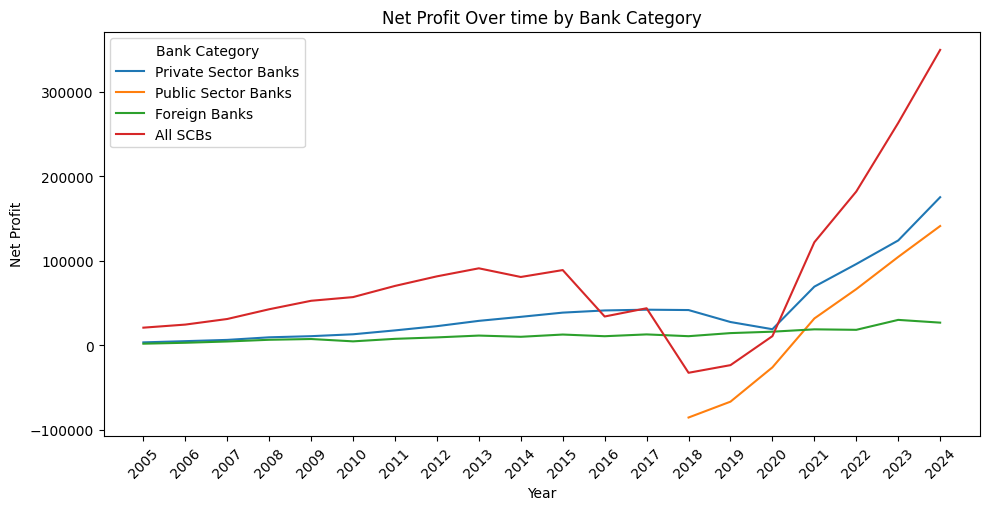

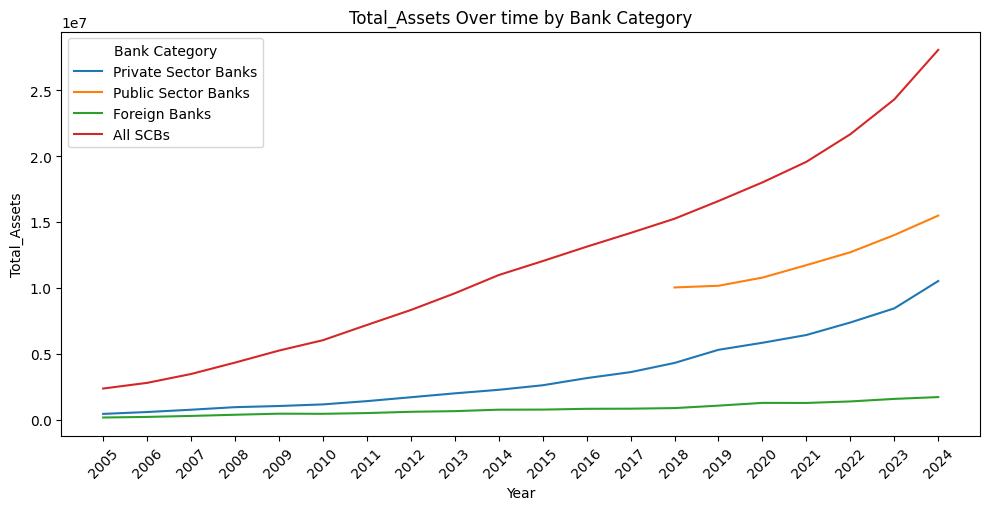

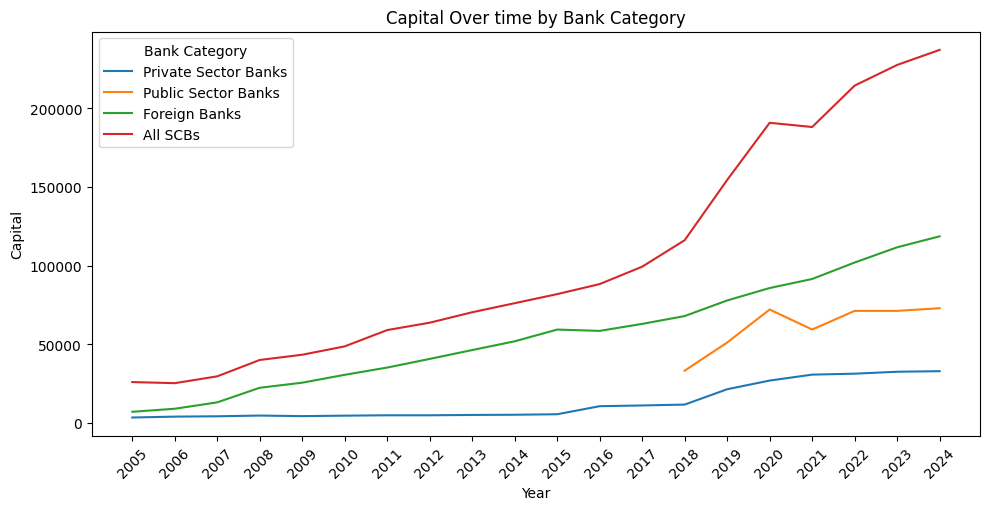

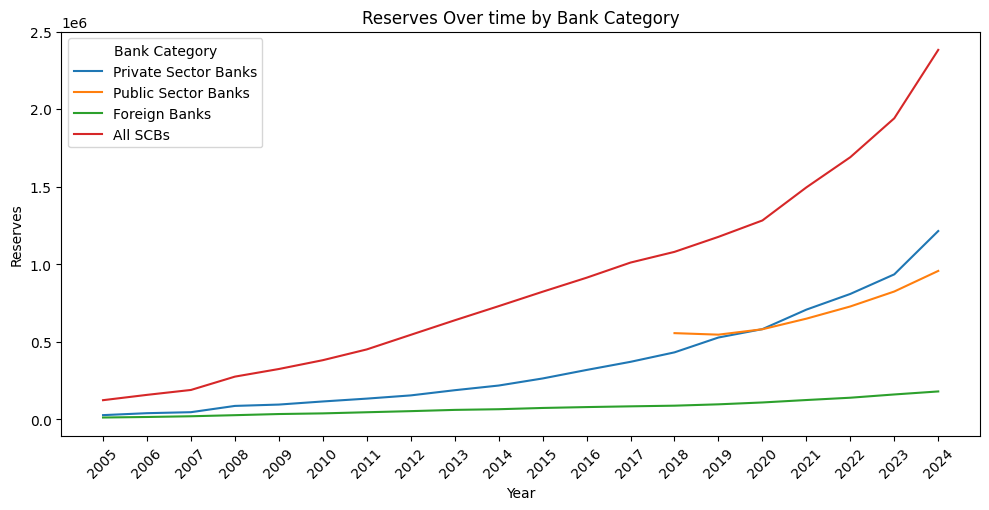

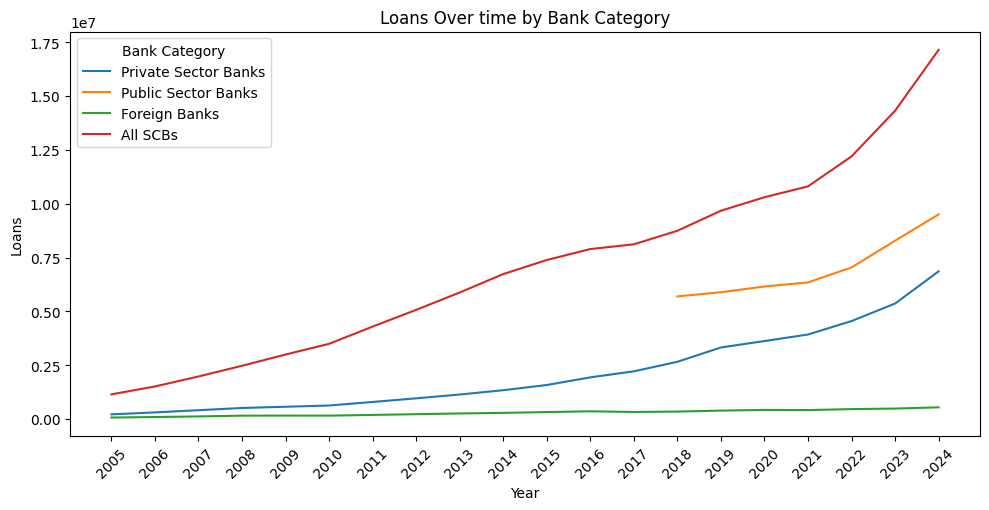

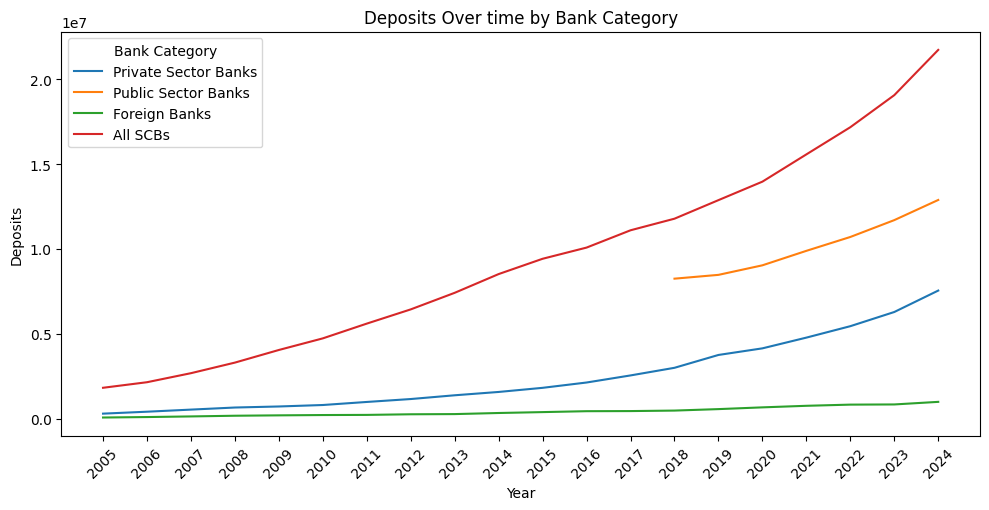

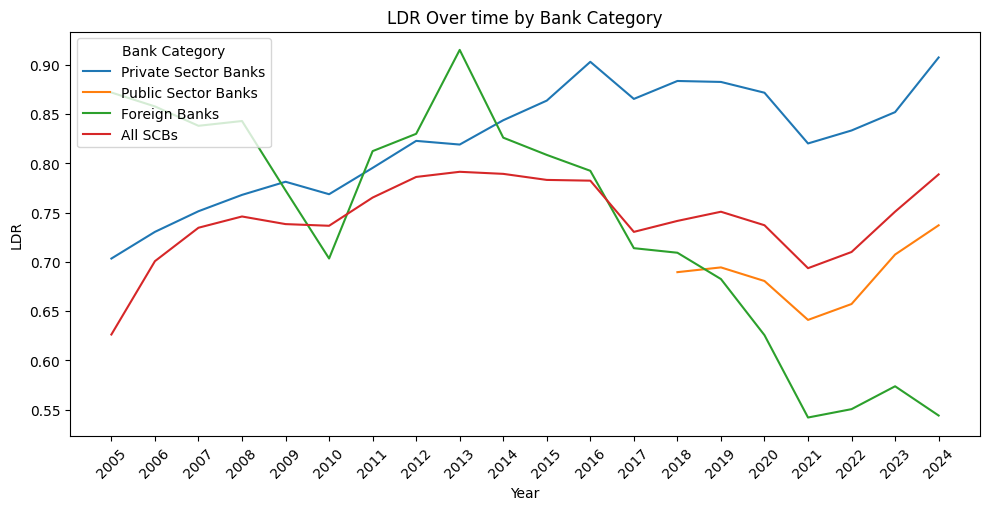

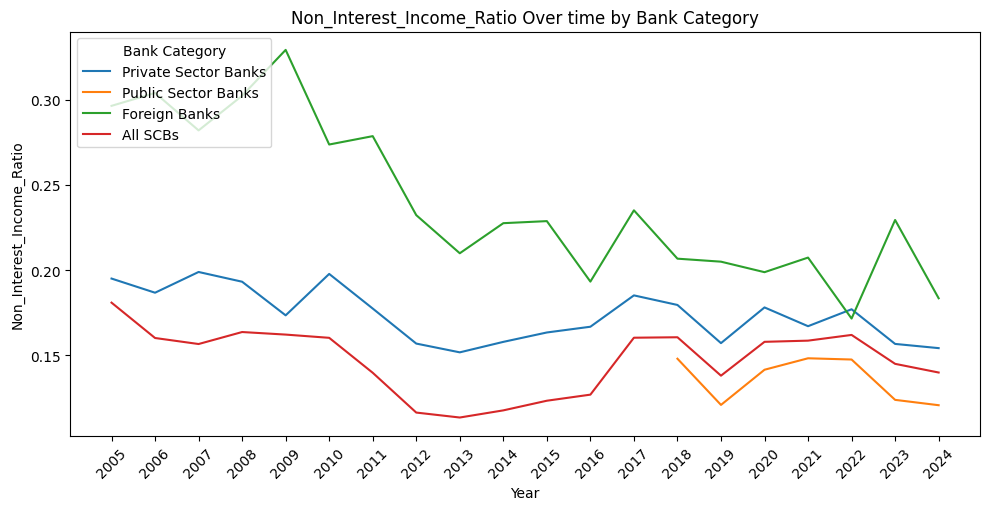

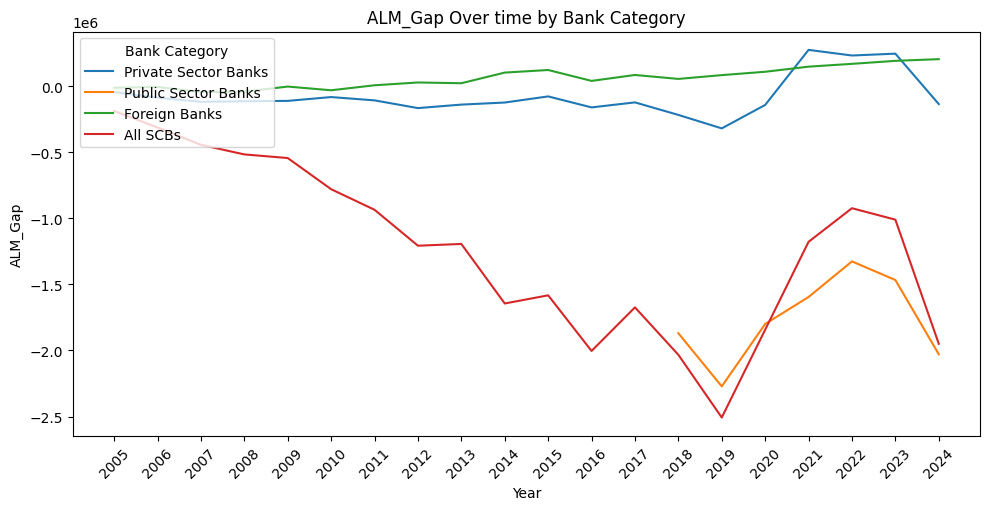

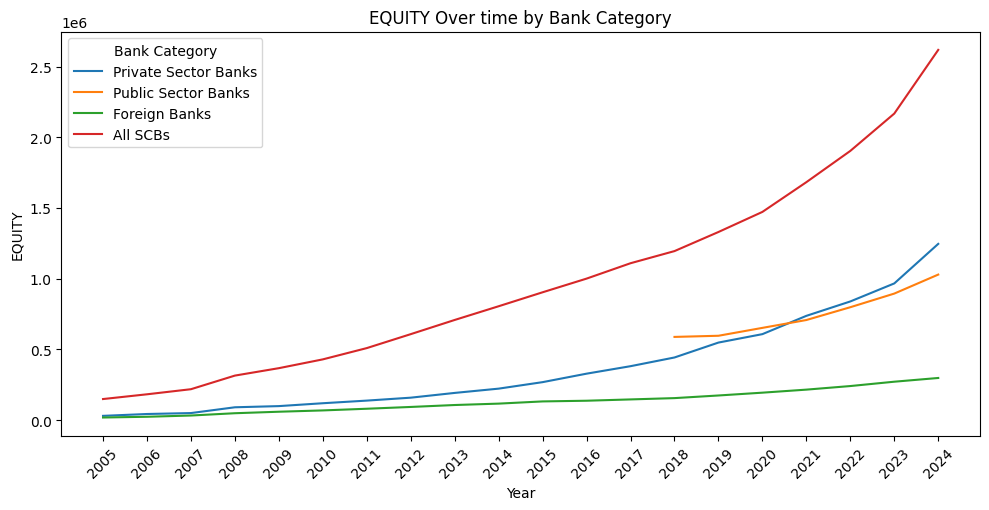

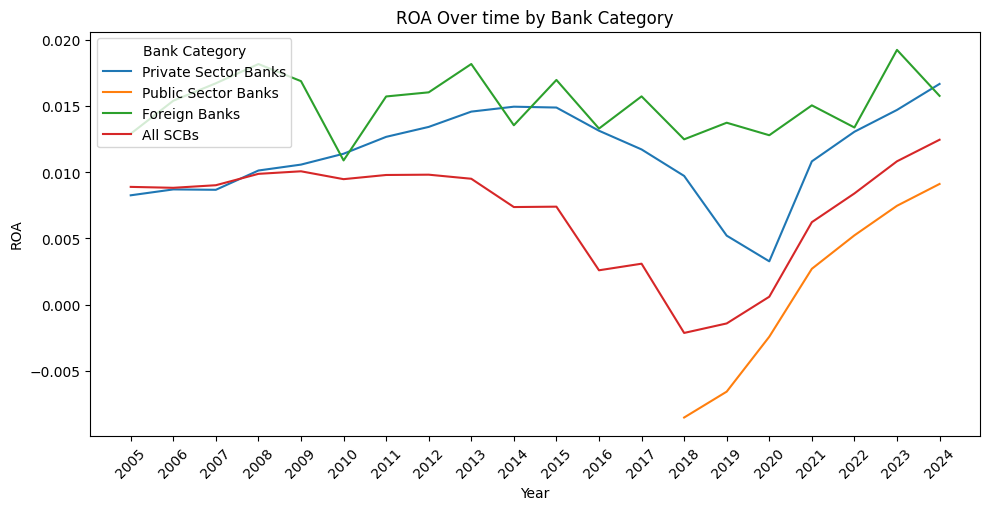

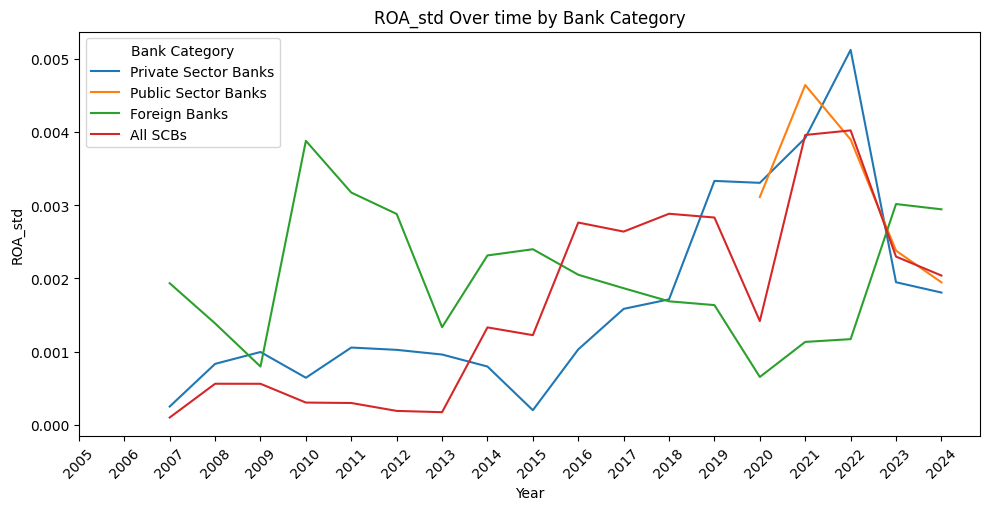

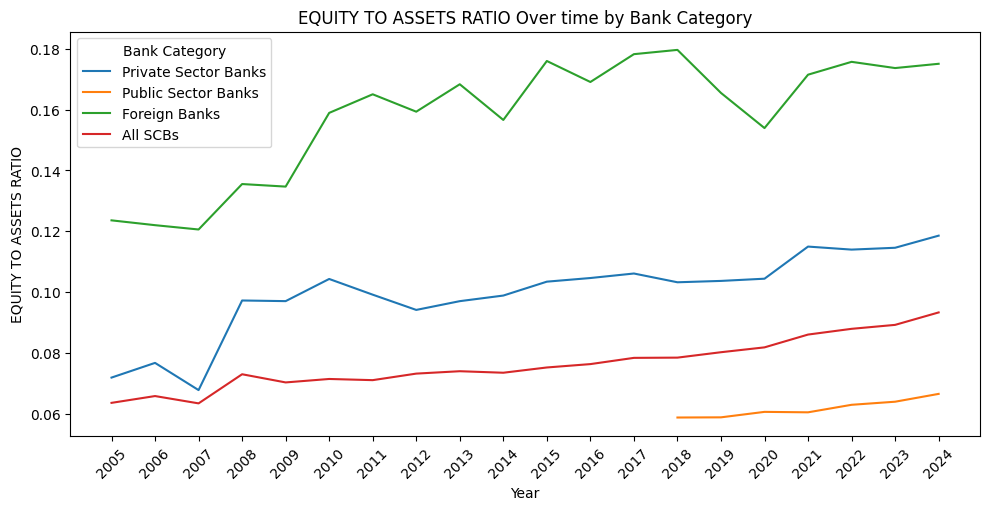

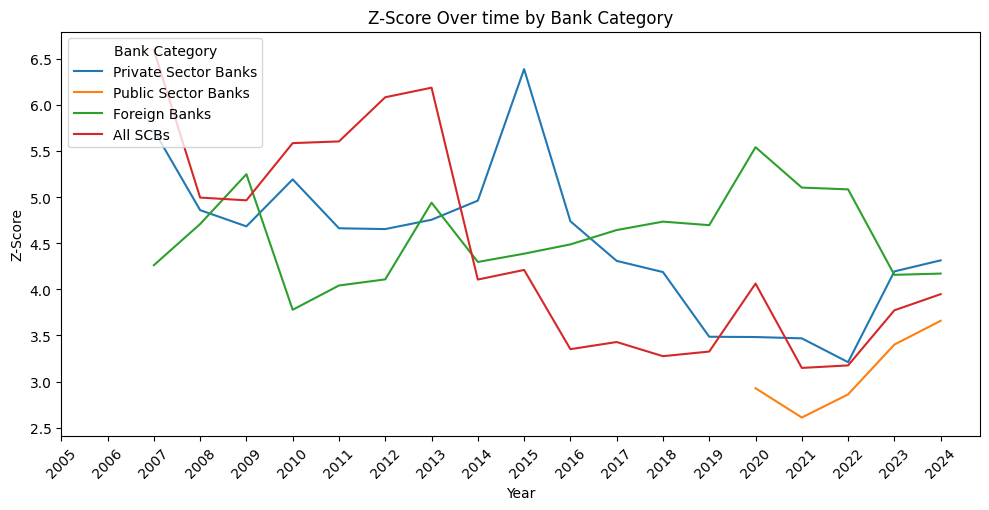

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

bank_categories = {
    'Private Sector Banks' : Private_Sector_banks,
    'Public Sector Banks' : Public_Sector_banks,
    'Foreign Banks' : Foreign_banks,
    'All SCBs' : All_SCBs
    }

exclude_col = ['Year','Banks','Unnamed: 16']

for col in Fin_sta_data.columns:
    if col not in  exclude_col:

        plt.figure(figsize = (10,5))

        for label,df in bank_categories.items():
            sns.lineplot(data = df, x= 'Year', y =col , label = label)

        plt.title(f'{col} Over time by Bank Category')
        plt.xlabel('Year')
        plt.ylabel(col)
        plt.legend(loc = 'upper left',title = 'Bank Category')
        plt.tight_layout()
        # plt.xlim((2005,2024))/
        plt.xticks(ticks=range(2005, 2025), rotation= 45)
        plt.show()

        
      
       

## Regression model


In [24]:
from linearmodels import PanelOLS,RandomEffects
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.read_csv('Fin_Stability_3.csv')
df = data.copy()

df['Year'] = df['Year'].replace([np.inf, -np.inf], np.nan)  # Replace inf with NaN
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)
df['Banks'] = df['Banks'].astype(str)

df = df.set_index(['Banks', 'Year'])

cols = ['Z-Score', 'Net Profit', 'LDR', 'Non_Interest_Income_Ratio','ALM_Gap', 'ROA', 'EQUITY TO ASSETS RATIO']

panel_data = df[cols].replace([np.inf, -np.inf], np.nan).dropna()

y = panel_data['Z-Score']
X = panel_data[[ 'LDR', 'Non_Interest_Income_Ratio','ALM_Gap',  'EQUITY TO ASSETS RATIO']]

# Checking for multiucollinearity of independent variables
X_vif = add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
print(vif_data)


# panel_data = add_constant(panel_data)



                     Feature       VIF
0                      const  2.839694
1                        LDR  1.052274
2  Non_Interest_Income_Ratio  1.108804
3                    ALM_Gap  1.018374
4     EQUITY TO ASSETS RATIO  1.168519


In [25]:
X_reduced = panel_data[[ 'LDR', 'ALM_Gap',  'EQUITY TO ASSETS RATIO']]


# model_FE = PanelOLS(y,X_reduced, entity_effects=True, check_rank=False, drop_absorbed= True)
# result_FE = model_FE.fit()
# print(result_FE)

model_FE = PanelOLS(y,X, entity_effects=True, check_rank=False, drop_absorbed= True)
result_FE = model_FE.fit()
print(result_FE)

                          PanelOLS Estimation Summary                           
Dep. Variable:                Z-Score   R-squared:                        0.0431
Estimator:                   PanelOLS   R-squared (Between):             -0.0443
No. Observations:                1564   R-squared (Within):               0.0431
Date:                Thu, Jul 03 2025   R-squared (Overall):             -0.0438
Time:                        18:25:01   Log-likelihood                   -2071.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.068
Entities:                         133   P-value                           0.0000
Avg Obs:                       11.759   Distribution:                  F(4,1427)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             16.068
                            

In [26]:
model_RE = RandomEffects(y,X, check_rank=False)
RE_results = model_RE.fit()
print(RE_results)

                        RandomEffects Estimation Summary                        
Dep. Variable:                Z-Score   R-squared:                        0.0556
Estimator:              RandomEffects   R-squared (Between):              0.2206
No. Observations:                1564   R-squared (Within):               0.0138
Date:                Thu, Jul 03 2025   R-squared (Overall):              0.1923
Time:                        18:25:01   Log-likelihood                   -2237.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      22.940
Entities:                         133   P-value                           0.0000
Avg Obs:                       11.759   Distribution:                  F(4,1560)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             22.940
                            

In [27]:
from linearmodels.panel import compare
comparison = compare({'FE': result_FE, 'RE': RE_results})
print(comparison)

                       Model Comparison                       
                                          FE                RE
--------------------------------------------------------------
Dep. Variable                        Z-Score           Z-Score
Estimator                           PanelOLS     RandomEffects
No. Observations                        1564              1564
Cov. Est.                         Unadjusted        Unadjusted
R-squared                             0.0431            0.0556
R-Squared (Within)                    0.0431            0.0138
R-Squared (Between)                  -0.0443            0.2206
R-Squared (Overall)                  -0.0438            0.1923
F-statistic                           16.068            22.940
P-value (F-stat)                      0.0000            0.0000
===========================     ============   ===============
LDR                                  -0.0006          4.01e-05
                                   (-0.7602)          (

In [28]:

def hausman(fe, re):
    # Extract coefficient and covariance data
    b = fe.params
    B = re.params

    # Align indices
    common_coef = b.index.intersection(B.index)
    b = b[common_coef]
    B = B[common_coef]

    v_b = fe.cov.loc[common_coef, common_coef]
    v_B = re.cov.loc[common_coef, common_coef]

    # Calculate test statistic
    diff = b - B
    v_diff = v_b - v_B

    stat = float(diff.T @ np.linalg.inv(v_diff) @ diff)
    df = diff.shape[0]
    pval = 1 - stats.chi2.cdf(stat, df)

    return pd.Series([stat, pval], index=['Chi-squared', 'p-value'])


from scipy import stats

hausman_result = hausman(result_FE, RE_results)
print(hausman_result)


Chi-squared    327.119094
p-value          0.000000
dtype: float64


                                     fitted_values
Banks                          Year               
BANK OF BARODA                 2024      -0.257351
BANK OF INDIA                  2024      -0.210023
BANK OF MAHARASHTRA            2024      -0.193233
CANARA BANK                    2024      -0.323697
CENTRAL BANK OF INDIA          2024      -0.213276
...                                            ...
SOCIETE GENERALE               2007      -0.106900
SONALI BANK                    2007      -0.816624
STANDARD CHARTERED BANK        2007      -0.237179
FOREIGN BANKS                  2007      -0.293880
ALL SCHEDULED COMMERCIAL BANKS 2007      -0.764225

[1564 rows x 1 columns]
                                     fitted_values
Banks                          Year               
BANK OF BARODA                 2024       0.059397
BANK OF INDIA                  2024       0.080557
BANK OF MAHARASHTRA            2024       0.106823
CANARA BANK                    2024       0.020970
CENTRA

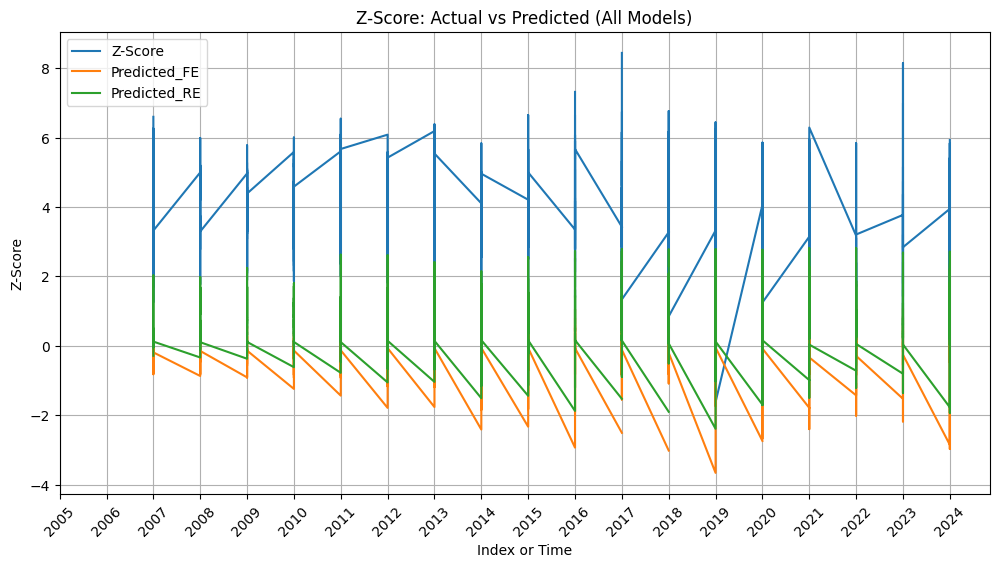

In [29]:
print(result_FE.fitted_values)
print(RE_results.fitted_values)
result_FE = pd.DataFrame(result_FE.fitted_values, index=panel_data.index)
RE_results = pd.DataFrame(RE_results.fitted_values, index=panel_data.index)
df['Predicted_FE'] = result_FE.fitted_values
df['Predicted_RE'] = RE_results.fitted_values

data1 = df.copy()
data1
data1 = data1.reset_index()
data1

# plt.figure(figsize=(10, 5))
# plt.plot(df.index, df['Predicted_FE'], label='FE Predicted', color='blue')
# plt.show()

data1[['Year','Z-Score', 'Predicted_FE', 'Predicted_RE']].plot(
    figsize=(12, 6),
    title='Z-Score: Actual vs Predicted (All Models)',
    grid=True, kind='line', x='Year'
)
plt.ylabel("Z-Score")
plt.xlabel("Index or Time")
plt.xticks(ticks=range(2005, 2025), rotation= 45)
plt.legend()
plt.show()



c:\MY R&A\Stock prediction by sentimental analysis\stock_prediction\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\MY R&A\Stock prediction by sentimental analysis\stock_prediction\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\MY R&A\Stock prediction by sentimental analysis\stock_prediction\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


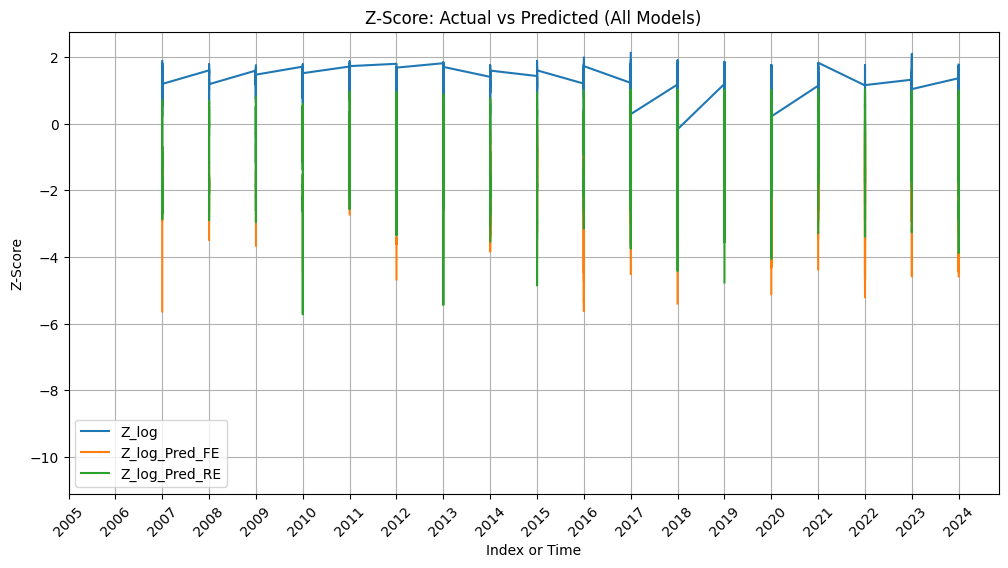

In [30]:
data1['Z_log'] = np.log(data1['Z-Score'])
data1['Z_log_Pred_FE'] = np.log(data1['Predicted_FE'])
data1['Z_log_Pred_RE'] = np.log(data1['Predicted_RE'])
data1[data1['Year']== 2017]
data1.dropna()
data1[['Year','Z_log', 'Z_log_Pred_FE', 'Z_log_Pred_RE']].plot(
    figsize=(12, 6),
    title='Z-Score: Actual vs Predicted (All Models)',
    grid=True, kind='line', x='Year'
)
plt.ylabel("Z-Score")
plt.xlabel("Index or Time")
plt.xticks(ticks=range(2005, 2025), rotation= 45)
plt.legend()
plt.show()

In [31]:
df.head()

,,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score,Predicted_FE,Predicted_RE
Banks,Year,,,,,,,,,,,,,,,,
BANK OF BARODA,2024,17788.7846,1.585797e+06,1035.533600,111188.05470,1.065782e+06,1.326958e+06,0.803177,0.114046,-134470.840,112223.588300,0.011218,0.002852,0.070768,3.358554,-0.257351,0.059397
BANK OF INDIA,2024,6317.9166,9.125979e+05,4553.407000,64327.26430,5.631447e+05,7.379202e+05,0.763151,0.091234,-127270.994,68880.671300,0.006923,0.001244,0.075478,4.193199,-0.210023,0.080557
BANK OF MAHARASHTRA,2024,4055.0272,3.071379e+05,7081.373639,12592.52566,2.002399e+05,2.707472e+05,0.739583,0.127609,-70493.318,19673.899299,0.013203,0.004120,0.064056,2.931209,-0.193233,0.106823
CANARA BANK,2024,14554.3192,1.491541e+06,1814.130300,85140.46050,9.316128e+05,1.312367e+06,0.709872,0.148576,-136950.800,86954.590800,0.009758,0.002598,0.058299,3.265707,-0.323697,0.020970
CENTRAL BANK OF INDIA,2024,2549.0580,4.466727e+05,8680.939400,23467.02510,2.434063e+05,3.850113e+05,0.632206,0.132961,-86566.970,32147.964500,0.005707,0.001512,0.071972,3.939097,-0.213276,0.112479


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)


model_fe = PanelOLS(y, X_scaled, entity_effects=True, check_rank=False, drop_absorbed=True)
result_fe = model_fe.fit()
print(result_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                Z-Score   R-squared:                        0.0431
Estimator:                   PanelOLS   R-squared (Between):             -0.0016
No. Observations:                1564   R-squared (Within):               0.0431
Date:                Thu, Jul 03 2025   R-squared (Overall):             -0.0035
Time:                        18:25:02   Log-likelihood                   -2071.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      16.068
Entities:                         133   P-value                           0.0000
Avg Obs:                       11.759   Distribution:                  F(4,1427)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             16.068
                            

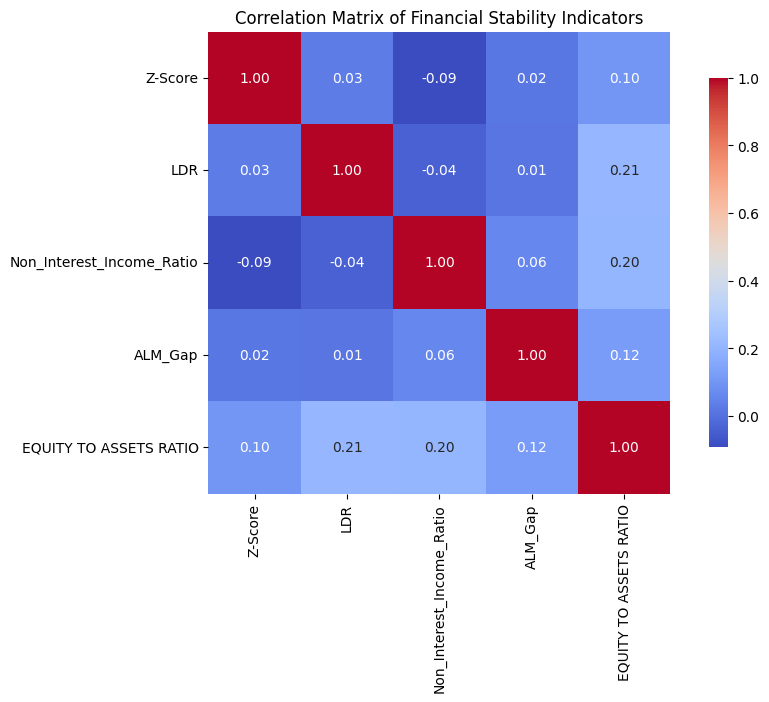

In [33]:
col = df[['Z-Score', 'LDR', 'Non_Interest_Income_Ratio', 'ALM_Gap', 'EQUITY TO ASSETS RATIO']]

cm = col.corr()
plt.figure(figsize=(10, 6)) 
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Financial Stability Indicators')
plt.show()

### CHECKING EFFECT OF EACH VARIABLE ON INDEPENDENT VARIABLE USING FIXED REGRESSION MODEL

In [34]:
df.head()

,,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score,Predicted_FE,Predicted_RE
Banks,Year,,,,,,,,,,,,,,,,
BANK OF BARODA,2024,17788.7846,1.585797e+06,1035.533600,111188.05470,1.065782e+06,1.326958e+06,0.803177,0.114046,-134470.840,112223.588300,0.011218,0.002852,0.070768,3.358554,-0.257351,0.059397
BANK OF INDIA,2024,6317.9166,9.125979e+05,4553.407000,64327.26430,5.631447e+05,7.379202e+05,0.763151,0.091234,-127270.994,68880.671300,0.006923,0.001244,0.075478,4.193199,-0.210023,0.080557
BANK OF MAHARASHTRA,2024,4055.0272,3.071379e+05,7081.373639,12592.52566,2.002399e+05,2.707472e+05,0.739583,0.127609,-70493.318,19673.899299,0.013203,0.004120,0.064056,2.931209,-0.193233,0.106823
CANARA BANK,2024,14554.3192,1.491541e+06,1814.130300,85140.46050,9.316128e+05,1.312367e+06,0.709872,0.148576,-136950.800,86954.590800,0.009758,0.002598,0.058299,3.265707,-0.323697,0.020970
CENTRAL BANK OF INDIA,2024,2549.0580,4.466727e+05,8680.939400,23467.02510,2.434063e+05,3.850113e+05,0.632206,0.132961,-86566.970,32147.964500,0.005707,0.001512,0.071972,3.939097,-0.213276,0.112479


In [41]:
import numpy as np
import pandas as pd
from scipy import stats

def hausman_test(fe, re):
    b = fe.params
    B = re.params

    # Align coefficients
    common = b.index.intersection(B.index)
    b = b[common]
    B = B[common]

    v_b = fe.cov.loc[common, common]
    v_B = re.cov.loc[common, common]

    diff = b - B
    v_diff = v_b - v_B

    try:
        stat = float(diff.T @ np.linalg.inv(v_diff) @ diff)
    except np.linalg.LinAlgError:
        stat = float(diff.T @ np.linalg.pinv(v_diff) @ diff)

    df = len(diff)
    pval = 1 - stats.chi2.cdf(stat, df)

    return pd.Series([stat, pval], index=['Chi-squared', 'p-value'])


In [42]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

df = df.dropna()
X_1 = df[['LDR', 'Non_Interest_Income_Ratio', 'ALM_Gap', 'EQUITY TO ASSETS RATIO']].copy()
X_1 = X_1.replace([np.inf, -np.inf], np.nan).dropna()
y = df['Z-Score'].copy()
y = y.dropna()

for i in X_1.columns:
     X = sm.add_constant(X_1[i])
     model_Pool = PooledOLS(y,X)
     results_Pool = model_Pool.fit()
     print(f' Results for {i}:\n', results_Pool.summary)
     
     model_FE = PanelOLS(y,X)
     results_FE = model_FE.fit()
     print(f' Results for {i}:\n', results_FE.summary)

     model_RE = RandomEffects(y,X)
     results_RE = model_RE.fit()
     print(f' Results for {i}:\n', results_RE.summary)

     print(f' Results for {i}:\n', compare({'FE': results_FE, 'RE': results_RE,'Pool' : results_Pool}))

     ht = hausman_test(results_FE, results_RE)
     print(f' Hausman Test for {i}:\n', ht)


# import numpy as np
# import statsmodels.api as sm
# from linearmodels.panel import PooledOLS

# # Define your X variables
# X_all = df[['LDR', 'Non_Interest_Income_Ratio', 'ALM_Gap', 'EQUITY TO ASSETS RATIO']].copy()
# y = df['Z-Score'].copy()

# for col in X_all.columns:
#     X = X_all[[col]].replace([np.inf, -np.inf], np.nan)
#     X = sm.add_constant(X)

#     # Align X and y properly by dropping rows with missing values in either
#     data = pd.concat([X, y], axis=1).dropna()
#     y_clean = data['Z-Score']
#     X_clean = data.drop(columns='Z-Score')

#     # Fit Pooled OLS model
#     model = PooledOLS(y_clean, X_clean)
#     results = model.fit()

#     print(f'\n📌 Results for variable: {col}')
#     print(results.summary)


 Results for LDR:
                           PooledOLS Estimation Summary                          
Dep. Variable:                Z-Score   R-squared:                        0.0008
Estimator:                  PooledOLS   R-squared (Between):             -0.0026
No. Observations:                1564   R-squared (Within):              -0.0015
Date:                Thu, Jul 03 2025   R-squared (Overall):              0.0008
Time:                        18:26:35   Log-likelihood                   -2422.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1.2613
Entities:                         133   P-value                           0.2616
Avg Obs:                       11.759   Distribution:                  F(1,1562)
Min Obs:                       1.0000                                           
Max Obs:                       18.000   F-statistic (robust):             1.2613
         

In [37]:
df.tail()

,,Net Profit,Total_Assets,Capital,Reserves,Loans,Deposits,LDR,Non_Interest_Income_Ratio,ALM_Gap,EQUITY,ROA,ROA_std,EQUITY TO ASSETS RATIO,Z-Score,Predicted_FE,Predicted_RE
Banks,Year,,,,,,,,,,,,,,,,
SOCIETE GENERALE,2007,22.1361,2.863618e+03,298.3464,49.9106,3.848703e+02,1.127778e+03,0.341264,0.189770,-1939.54,348.2570,0.007730,0.004968,0.121614,3.259468,-0.106900,0.340856
SONALI BANK,2007,0.6068,3.996850e+01,0.2038,4.9499,3.334400e+00,2.810400e+01,0.118645,0.719832,-15.22,5.1537,0.015182,0.015728,0.128944,2.215247,-0.816624,0.356933
STANDARD CHARTERED BANK,2007,1364.3122,5.889135e+04,528.1975,5272.6184,3.010380e+04,3.417467e+04,0.880881,0.249806,-15139.90,5800.8159,0.023167,0.003499,0.098500,3.548724,-0.237179,0.260740
FOREIGN BANKS,2007,4585.1623,2.743921e+05,12999.3649,20076.0889,1.263386e+05,1.507499e+05,0.838067,0.282116,-43751.47,33075.4538,0.016710,0.001933,0.120541,4.262516,-0.293880,0.293093
ALL SCHEDULED COMMERCIAL BANKS,2007,31202.6094,3.459962e+06,29559.4032,189619.1448,1.981236e+06,2.696937e+06,0.734625,0.156674,-443141.23,219178.5480,0.009018,0.000099,0.063347,6.598782,-0.764225,-0.283813


In [38]:
data = df.reset_index()
df1 = data[(data['Year'] >= 2007) & (data['Year'] <=2016)]
df2 = data[(data['Year'] >= 2017) & (data['Year'] <=2014)]
